In [371]:
# 필요 패키지 import
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [27]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [29]:
%matplotlib inline

#주피터 노트북 내부에 그림 표시하게 명령
#UsageError: unrecognized arguments가 나오는 이유 -> 저 명령에선 '#'이 주석이 아님

In [3]:
netflix = pd.read_csv('netflix_titles.csv', header=0)
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [17]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
# 1. 타입(type) 확인하기 
type_counts = netflix['type'].value_counts()
print(type_counts)

type
Movie      5377
TV Show    2410
Name: count, dtype: int64


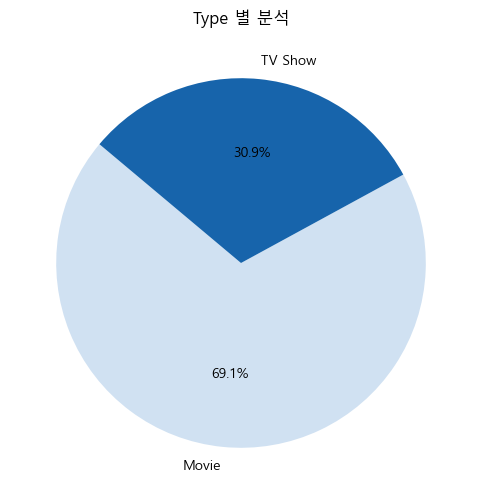

In [221]:
plt.figure(figsize=(8, 6))
labels = type_counts.index
sizes = type_counts.values
cmap = plt.get_cmap('Blues')
colors = cmap(np.linspace(0.2, 0.8, len(sizes)))  # 색상 범위 설정: 0.2~0.8

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors= colors)
plt.title('Type 별 분석')
plt.show()

In [9]:
# 2. 국가(country) 확인하기 
country_counts = netflix['country'].value_counts()
print(country_counts)

country
United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64


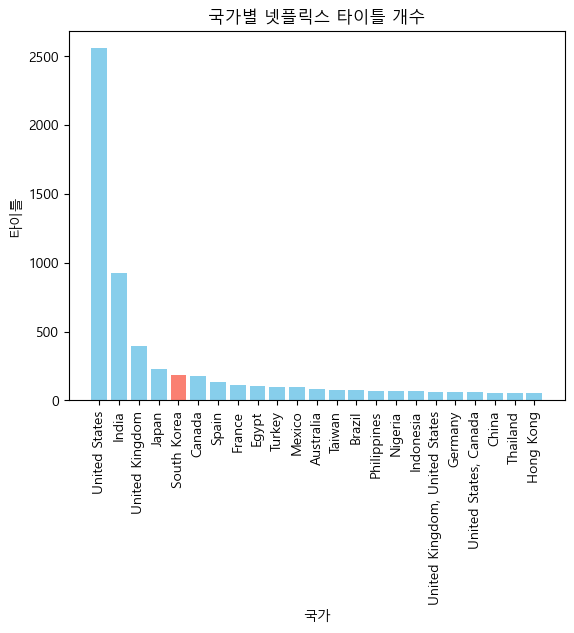

In [201]:
# 크기가 50 이상인 데이터만 표기 하기
country_counts_f = country_counts[country_counts > 50]


colors = ['skyblue' for i in range(len(country_counts_f))]
# 5번째 막대(인덱스 4)의 색상만 빨간색으로 변경
colors[4] = 'salmon'

plt.bar(country_counts_f.index, country_counts_f.values, color = colors)
plt.title('국가별 넷플릭스 타이틀 개수')
plt.xlabel('국가')
plt.ylabel('타이틀')
plt.xticks(rotation=90)  # x축 레이블 회전

plt.show()

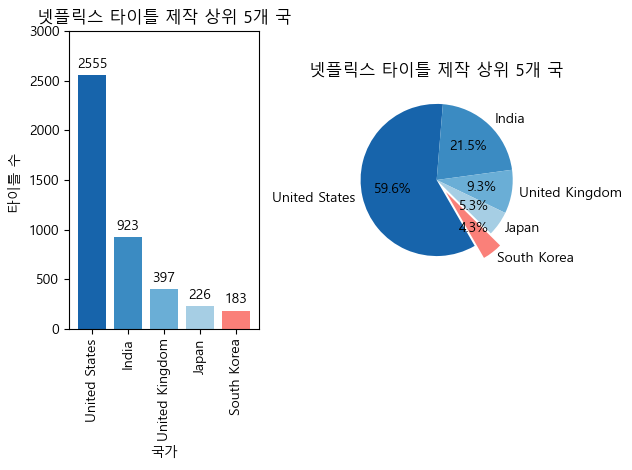

In [235]:
# 상위 5개의 데이터만 표기하기
country_counts_f = country_counts.head(5)

# 막대 그래프 그리기
plt.subplot(1, 2, 1)
colors = cmap(np.linspace(0.8, 0.2, len(sizes)))  # 색상 범위 설정: 0.2~0.8
explode = [0, 0, 0, 0, 0.20]
colors[4]= [0.9803921568627451, 0.5019607843137255, 0.4745098039215686, 1.0]
bars = plt.bar(country_counts_f.index, country_counts_f.values, color = colors)
plt.title('넷플릭스 타이틀 제작 상위 5개 국')
plt.xlabel('국가')
plt.ylabel('타이틀 수 ')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.bar_label(bars, fmt='%d', padding=3)
plt.ylim([0, 3000])     # Y축의 범위: [ymin, ymax]


plt.subplot(1, 2, 2)
plt.title('넷플릭스 타이틀 제작 상위 5개 국')
labels = country_counts_f.index
sizes = country_counts_f.values
cmap = plt.get_cmap('Blues')
colors = cmap(np.linspace(0.8, 0.2, len(sizes)))  # 색상 범위 설정: 0.2~0.8
explode = [0, 0, 0, 0, 0.20]
colors[4]= [0.9803921568627451, 0.5019607843137255, 0.4745098039215686, 1.0]
plt.pie(sizes, labels =labels, autopct='%.1f%%', startangle=-60, counterclock=False, colors = colors, explode=explode)
# startangle 시작각도 설정(디폴트 0도는 3시 방향임, 반시계뱡향으로 degree를 조절 )
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됨

# 그래프 표시
plt.tight_layout()
plt.show()

In [215]:
# 3. 출시년도(release_year) 확인하기 
year_counts = netflix['release_year'].value_counts().sort_index()
print(year_counts)

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: count, Length: 73, dtype: int64


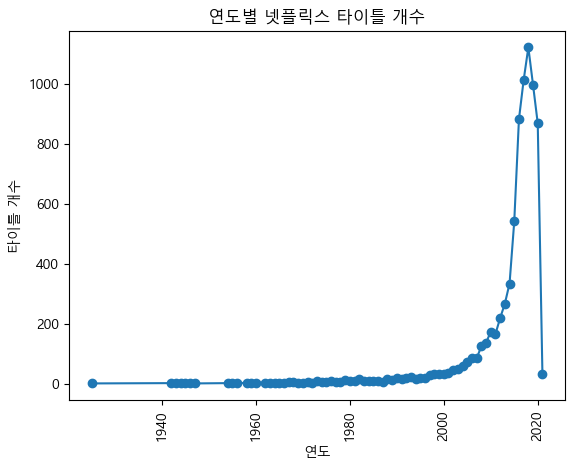

In [229]:
plt.plot(year_counts, 'o-')
plt.title('연도별 넷플릭스 타이틀 개수')
plt.xlabel('연도')
plt.ylabel('타이틀 개수')
plt.xticks(rotation=90)  # x축 레이블 회전

plt.show()

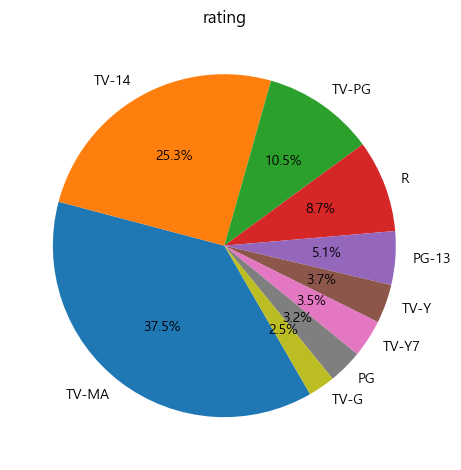

In [253]:
# 4. (rating) 확인하기 
rating_counts = netflix['rating'].value_counts()

rating_counts_f = rating_counts[rating_counts > 100]

plt.title('rating')
labels = rating_counts_f.index
sizes = rating_counts_f.values
cmap = plt.get_cmap('Blues')
plt.pie(sizes, labels =labels, autopct='%.1f%%', startangle=-60, counterclock=False)
# startangle 시작각도 설정(디폴트 0도는 3시 방향임, 반시계뱡향으로 degree를 조절 )
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됨

# 그래프 표시
plt.tight_layout()
plt.show()


#rating 자체보다 다른 데이터와 연계해서 분석하면 좋을 거 같다(추후 추가)

In [257]:
# 5. (duration) 확인하기
duration_counts = netflix['duration'].value_counts()
print(duration_counts)

duration
1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: count, Length: 216, dtype: int64


In [331]:
def process(value):
    if 'min' in value:
        value = value.replace(' min', '')
        num = int(value)
        
        if num <= 60:
            return 'h01'
        elif num <= 120:
            return 'h02'
        elif num <= 180:
            return 'h03'
        else:
            return 'hlong'
    else:
        if 'Season' in value:
            value = value.split(" ")[0]
            if int(value) <10:
                return "s"+"0"+value
            else:
                return "s10over"

netflix['group'] =netflix['duration'].apply(process)
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,group
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,s04
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,h02
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",h02
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",h02
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,h03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,h02
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,h02
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",h01
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,s01


In [333]:
group_counts = netflix['group'].value_counts().sort_index()
print(group_counts)

group
h01         446
h02        3920
h03         973
hlong        38
s01        1608
s02         382
s03         184
s04          87
s05          58
s06          30
s07          19
s08          18
s09           8
s10over      16
Name: count, dtype: int64


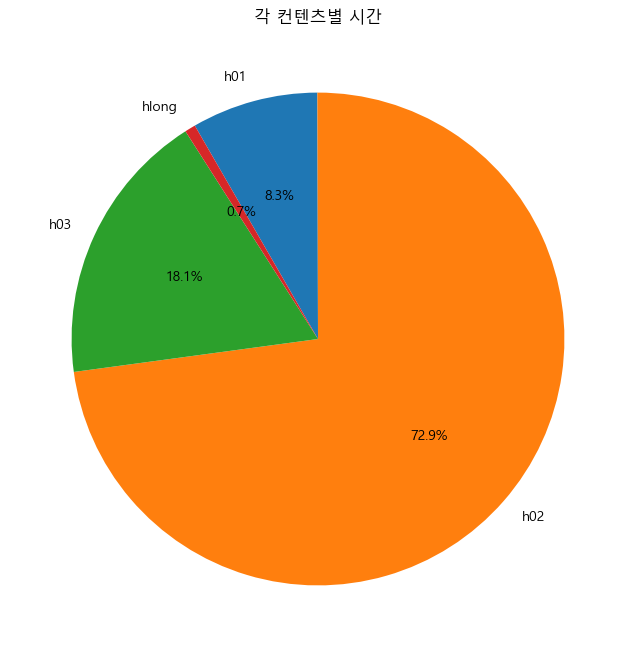

In [335]:
df_h = netflix[netflix['group'].str.startswith('h')]


# 그룹별 빈도수 계산
counts = df_h['group'].value_counts().sort_index()

# 파이 그래프 생성
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=120, counterclock=False)
plt.title('각 컨텐츠별 시간')

plt.show()


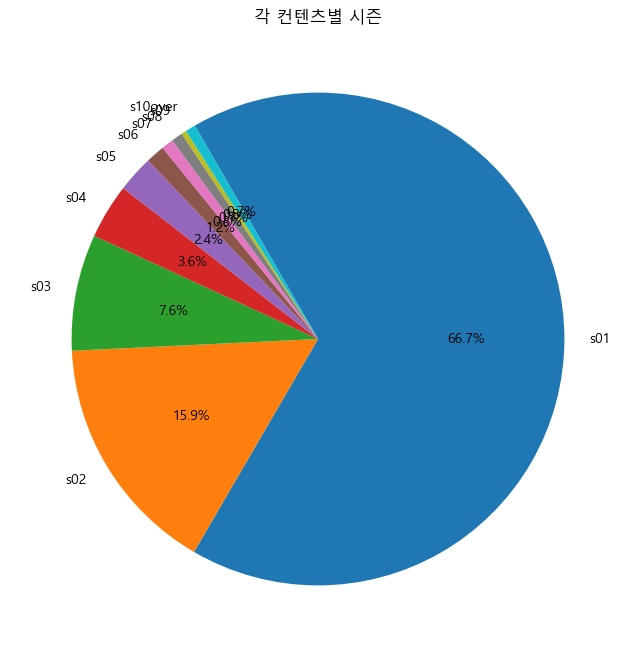

In [339]:
df_s = netflix[netflix['group'].str.startswith('s')]


# 그룹별 빈도수 계산
counts = df_s['group'].value_counts().sort_index()

# 파이 그래프 생성
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=120, counterclock=False)
plt.title('각 컨텐츠별 시즌')

plt.show()


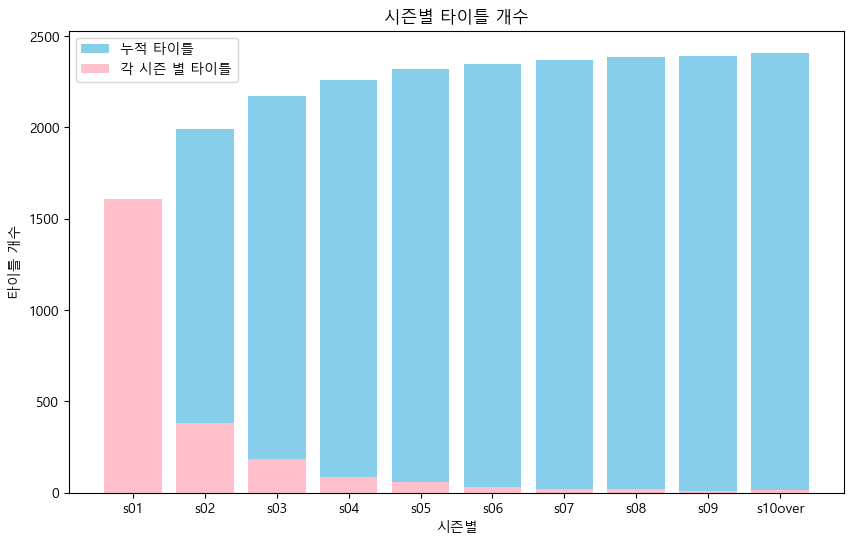

In [369]:
df_s = netflix[netflix['group'].str.startswith('s')]


# 그룹별 빈도수 계산
counts = df_s['group'].value_counts().sort_index()

# 누적 빈도수 계산
cumulative_counts = counts.cumsum()

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 일반 막대 그래프
ax.bar(cumulative_counts.index, cumulative_counts, color='skyblue', label='누적 타이틀')
bars = ax.bar(counts.index, counts, color='pink', label='각 시즌 별 타이틀')

# 누적 막대 그래프를 같은 위치에 겹쳐서 그리기


# 레이블 및 제목 설정
ax.set_xlabel('시즌별')
ax.set_ylabel('타이틀 개수')
ax.set_title('시즌별 타이틀 개수')
ax.legend()

plt.show()